# Three generations seeking romance - Regression & Classification
This is a  Regression & Classification project

A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION
1 - Can your dating profile predict your age?
2 - Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)
Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.
By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('profiles.csv')
pd.set_option('display.max_columns', None)

### EDA - Exploratory Data Analysis

In [3]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [5]:
df[df.isnull().all(axis=1)]  #Tüm sütunları NaN olanları aldık

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(df[df.isnull().all(axis=1)].index, inplace=True)  #tüm sütunları NaN olan satırları kaldırıyoruz

In [7]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success o

In [8]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [9]:
df=df.drop(['location','last_online','sign','ethnicity','job','pets',
            'essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis=1)

In [10]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
height            0
income            0
offspring      5628
orientation       0
religion       3253
sex               0
smokes          918
speaks            6
status            0
dtype: int64

In [11]:
mode_columns=['body_type','diet','drinks','drugs','education',
              'offspring','religion','smokes','speaks']

for i in mode_columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [12]:
df['body_type'].value_counts()

body_type
average           3122
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: count, dtype: int64

<Axes: xlabel='body_type'>

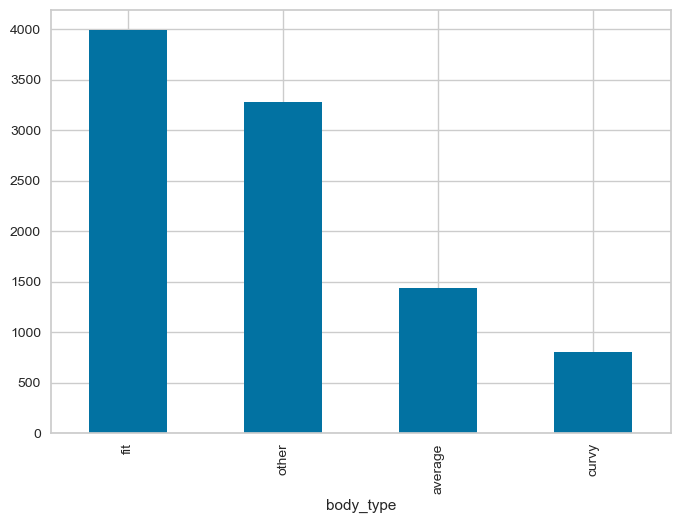

In [13]:
def bt(x):
    if x in ['fit','athletic','jacked']:
        return 'fit'
    elif x in ['thin','skinny','a little extra']:
        return 'average'
    elif x in ['curvy','full figured']:
        return 'curvy'
    else: return 'other'

df['body_type']=df['body_type'].apply(bt)
df['body_type'].value_counts().plot.bar()

In [14]:
df['diet'].value_counts()

diet
mostly anything        6374
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: count, dtype: int64

<Axes: xlabel='diet'>

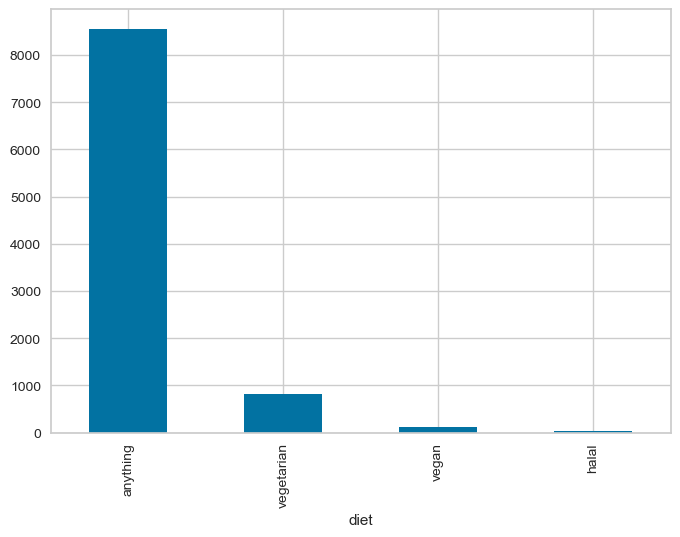

In [15]:
def diet(x):
    if 'vegetarian' in x:
        return 'vegetarian'
    elif 'vegan' in x:
        return 'vegan'
    elif 'halal' in x or 'kosher' in x:
        return 'halal'
    else: return 'anything'
    
df['diet']=df['diet'].apply(diet)
df['diet'].value_counts().plot.bar()

In [16]:
df['drinks'].value_counts()

drinks
socially       7181
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: count, dtype: int64

<Axes: xlabel='drinks'>

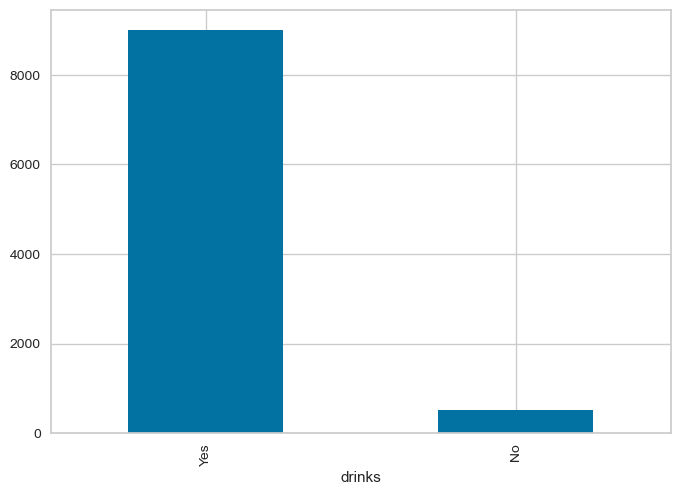

In [17]:
df['drinks']=df['drinks'].apply(lambda x: 'No' if x=='not at all' else 'Yes')
df['drinks'].value_counts().plot.bar()

In [18]:
df['drinks'].value_counts()

drinks
Yes    9005
No      509
Name: count, dtype: int64

In [19]:
df['drugs'].value_counts()

drugs
never        8271
sometimes    1181
often          62
Name: count, dtype: int64

<Axes: xlabel='drugs'>

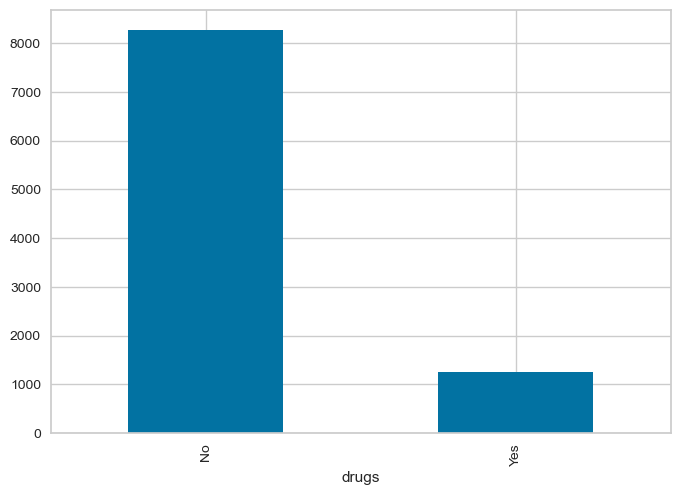

In [20]:
df['drugs'] = df['drugs'].apply(lambda x: 'No' if x == 'never' else 'Yes')
df['drugs'].value_counts().plot.bar()

In [21]:
df['drugs'].value_counts()

drugs
No     8271
Yes    1243
Name: count, dtype: int64

In [22]:
df['education'].value_counts()

education
graduated from college/university    4825
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters p

<Axes: xlabel='education'>

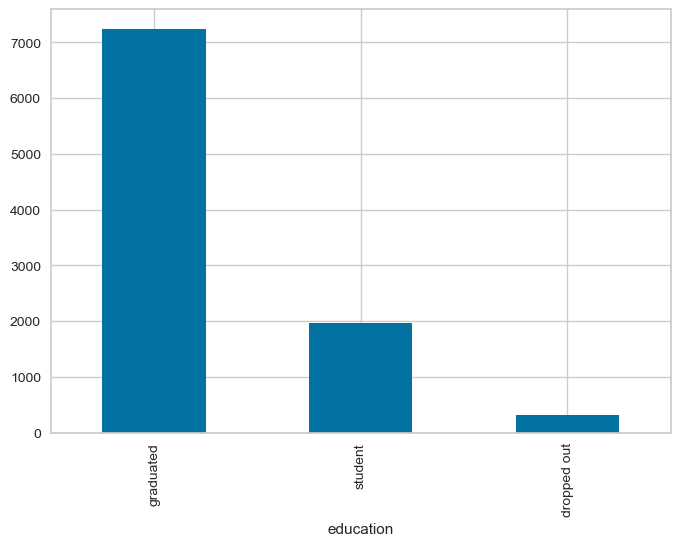

In [24]:
def education(x):
    if 'graduated' in x:
        return 'graduated'
    elif 'dropped out' in x:
        return 'dropped out'
    else:
        return 'student'
    
df['education']=df['education'].apply(education)
df['education'].value_counts().plot.bar()

In [25]:
df['offspring'].value_counts()

offspring
doesn&rsquo;t have kids                                6852
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: count, dtype: int64

<Axes: xlabel='offspring'>

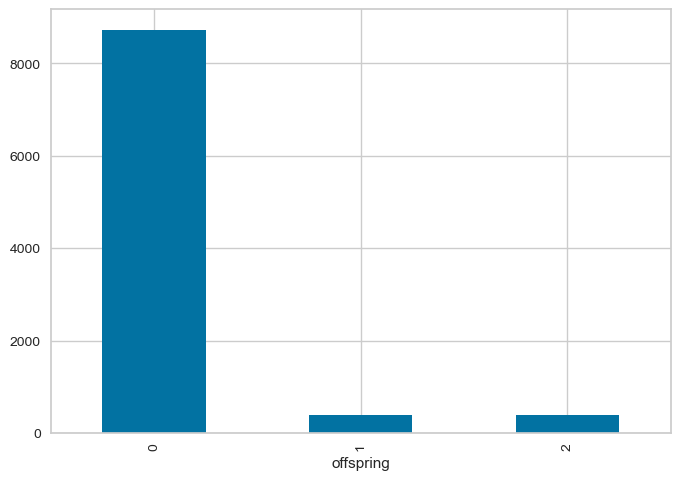

In [26]:
df['offspring'] = df['offspring'].apply(lambda x: 2 if 'has kids' in x else (1 if 'has a kid' in x else 0))
df['offspring'].value_counts().plot.bar()

<Axes: xlabel='orientation'>

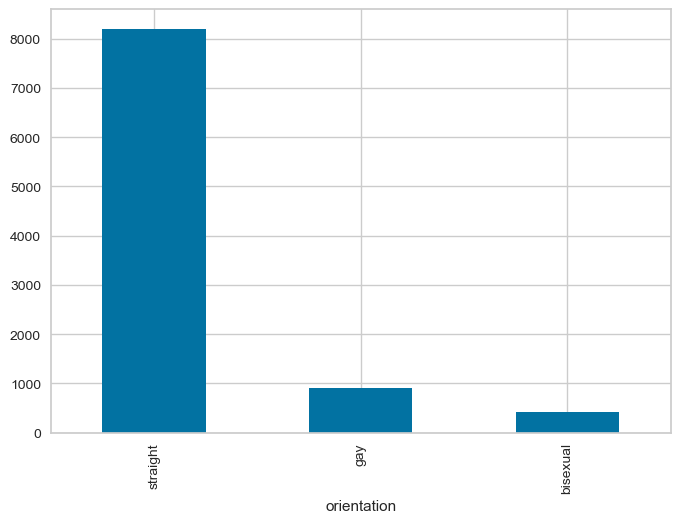

In [27]:
df['orientation'].value_counts().plot.bar()

In [28]:
df['religion'].value_counts()

religion
agnosticism                                   3701
other                                          417
agnosticism but not too serious about it       400
agnosticism and laughing about it              386
catholicism but not too serious about it       367
atheism                                        363
atheism and laughing about it                  329
other and laughing about it                    325
christianity but not too serious about it      320
christianity                                   297
other but not too serious about it             243
judaism but not too serious about it           232
atheism but not too serious about it           200
catholicism                                    165
atheism and somewhat serious about it          138
christianity and somewhat serious about it     133
other and somewhat serious about it            122
catholicism and laughing about it              117
judaism and laughing about it                  113
agnosticism and somewh

<Axes: xlabel='religion'>

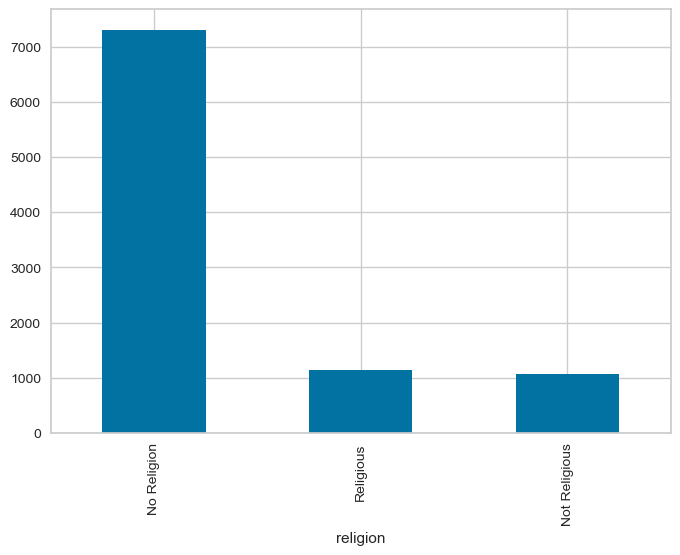

In [30]:
def fixed_religion(x):
    if 'agnosticism' in x or 'atheism' in x or 'other' in x or 'laughing about it' in x:
        return 'No Religion'
    elif 'not too serious about it' in x:
        return 'Not Religious'
    elif 'christianity' in x or 'catholicism' in x or 'judaism' in x or 'buddhism' in x or 'hinduism' in x or 'islam' in x:
        return 'Religious'
    else:
        return x
    
df['religion'] = df['religion'].apply(fixed_religion)
df['religion'].value_counts().plot.bar()

In [31]:
df['religion'].value_counts()

religion
No Religion      7312
Religious        1134
Not Religious    1068
Name: count, dtype: int64

In [32]:
df['sex'].value_counts()

sex
m    5675
f    3839
Name: count, dtype: int64

In [33]:
df['smokes'].value_counts()

smokes
no                7929
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: count, dtype: int64

<Axes: xlabel='smokes'>

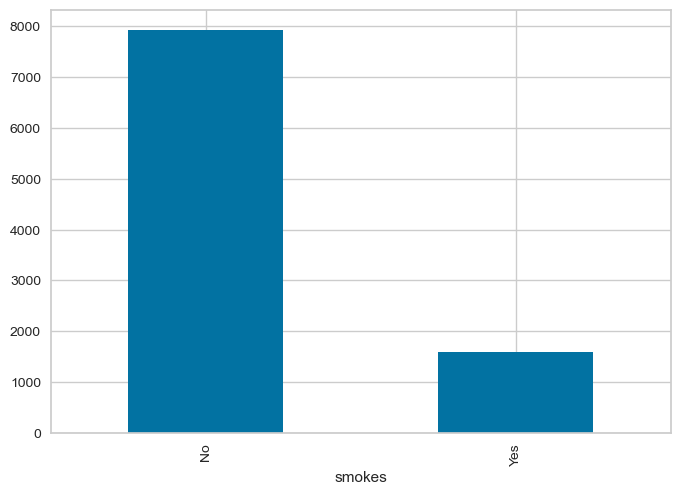

In [34]:
df['smokes']=df['smokes'].apply(lambda x: 'No' if x== 'no' else 'Yes')
df['smokes'].value_counts().plot.bar()

In [35]:
df['speaks'].value_counts()

speaks
english                                                                                3421
english (fluently)                                                                     1106
english (fluently), spanish (okay)                                                      322
english (fluently), spanish (poorly)                                                    321
english (fluently), spanish (fluently)                                                  195
                                                                                       ... 
english (fluently), hindi (fluently), spanish (okay)                                      1
english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
english (fluently), spanish (fluently), portuguese                                        1
english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
english (fluently), french (okay), swedish (poorly)                      

<Axes: xlabel='speaks'>

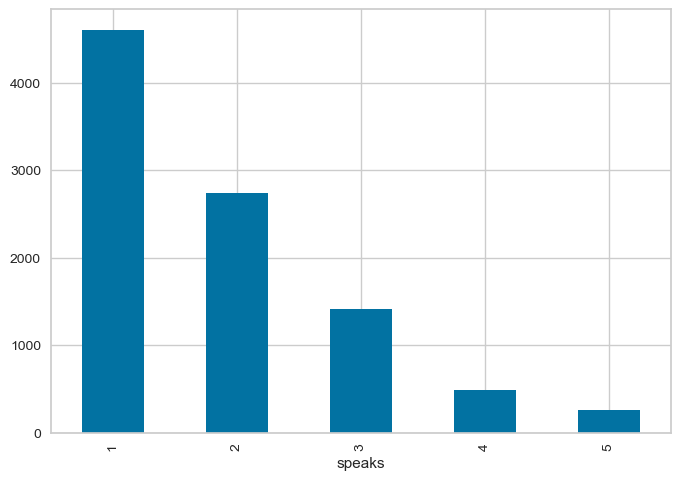

In [36]:
df['speaks'] = df['speaks'].str.count(',') + 1
df['speaks'].value_counts().plot.bar()

In [37]:
df['status'].value_counts()

status
single            8909
seeing someone     289
available          270
married             46
Name: count, dtype: int64

<Axes: xlabel='status'>

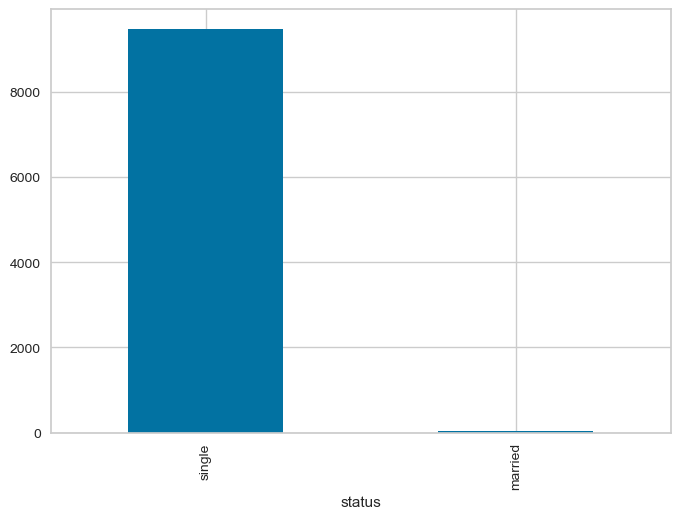

In [38]:
df['status']=df['status'].apply(lambda x: 'married' if x == 'married' else 'single')
df['status'].value_counts().plot.bar()

<Axes: xlabel='income'>

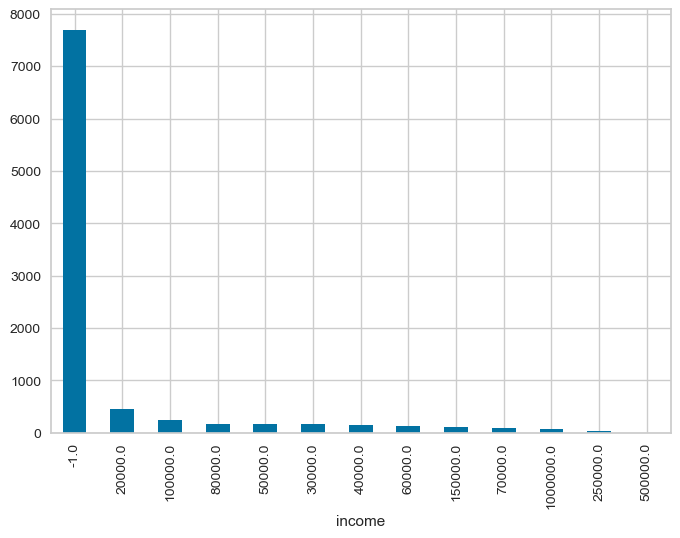

In [42]:
df['income'].value_counts().plot.bar()

<Axes: xlabel='generation'>

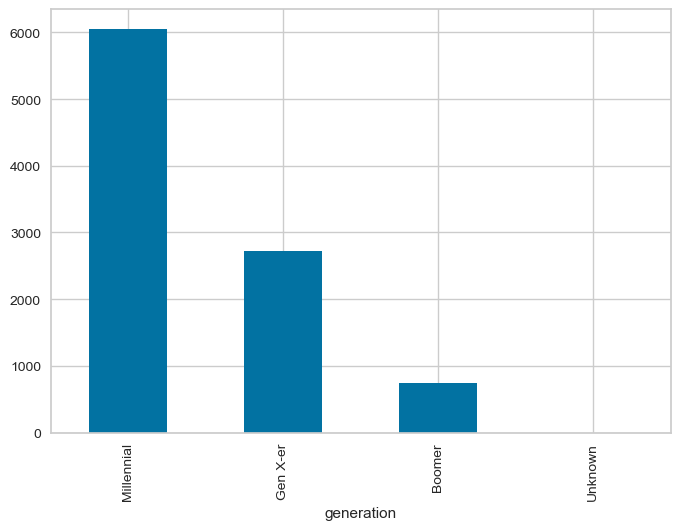

In [39]:
def generation(x):
    if 18 <= x <= 32:
        return "Millennial"
    elif 33 <= x <= 47:
        return "Gen X-er"
    elif 48 <= x <= 70:
        return "Boomer"
    else:
        return 'Unknown'
df['generation'] = df['age'].apply(generation)
df['generation'].value_counts().plot.bar()

In [40]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,offspring,orientation,religion,sex,smokes,speaks,status,generation
5723,24.0,fit,anything,Yes,No,graduated,67.0,-1.0,0,straight,No Religion,m,No,2,single,Millennial


In [43]:
abs(df.corr(numeric_only=True)['age'].sort_values(ascending=False))

age          1.000000
offspring    0.409088
income       0.011424
height       0.022078
speaks       0.024553
Name: age, dtype: float64

<Axes: >

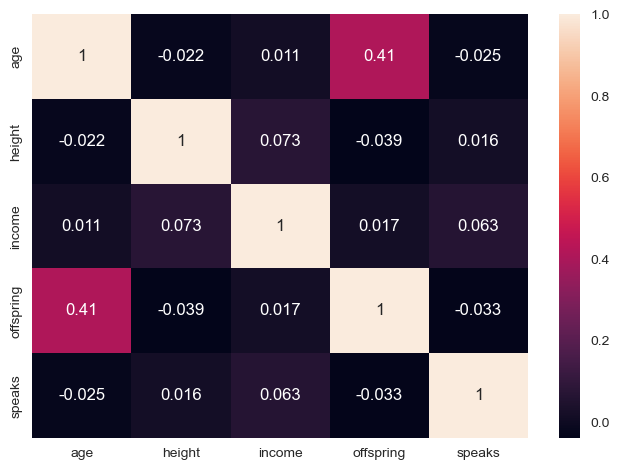

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Regression

In [49]:
x=df.drop(['age'],axis=1)
x=pd.get_dummies(x, drop_first=True)
y=df['age']

In [50]:
x

,height,income,offspring,speaks,body_type_curvy,body_type_fit,body_type_other,diet_halal,diet_vegan,diet_vegetarian,drinks_Yes,drugs_Yes,education_graduated,education_student,orientation_gay,orientation_straight,religion_Not Religious,religion_Religious,sex_m,smokes_Yes,status_single,generation_Gen X-er,generation_Millennial,generation_Unknown
0,75.0,-1.0,0,1,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,True,False,True,False
1,70.0,80000.0,0,3,False,False,True,False,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,False
2,68.0,-1.0,0,3,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,True,False,False
3,71.0,20000.0,0,2,False,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False
4,66.0,-1.0,0,1,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,73.0,60000.0,0,2,False,True,False,False,False,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False
9510,72.0,-1.0,0,1,False,True,False,False,False,False,True,True,True,False,True,False,False,False,True,True,True,False,True,False
9511,71.0,-1.0,0,1,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,True,True,True,False,False
9512,70.0,-1.0,0,3,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,True,False


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        rf = RandomForestRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor','Random Forest']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [52]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.854464,3.636902,2.973397
Linear,0.851095,3.678750,3.001047
Ridge,0.851029,3.679572,3.001585
XGBRegressor,0.842774,3.780141,3.055093
Random Forest,0.832558,3.901023,3.145777
Extra Tree,0.738550,4.874618,3.790959
Decision Tree,0.738136,4.878475,3.775878
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.551398,6.385228,4.246873
ElasticNet,0.335814,7.769463,5.322896


### Classification

In [53]:
x=df.drop(['generation'],axis=1)
x=pd.get_dummies(x)
y=df['generation']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [57]:
g=GaussianNB()
b=BernoulliNB()

In [58]:
g.fit(x_train,y_train)

GaussianNB()

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
gthamin=g.predict(x_test)

In [61]:
accuracy_score(gthamin,y_test)

0.9637414608512874

In [62]:
confusion_matrix(gthamin,y_test)

array([[ 145,    0,    0],
       [   3,  467,    0],
       [   0,   66, 1222]], dtype=int64)

<Axes: >

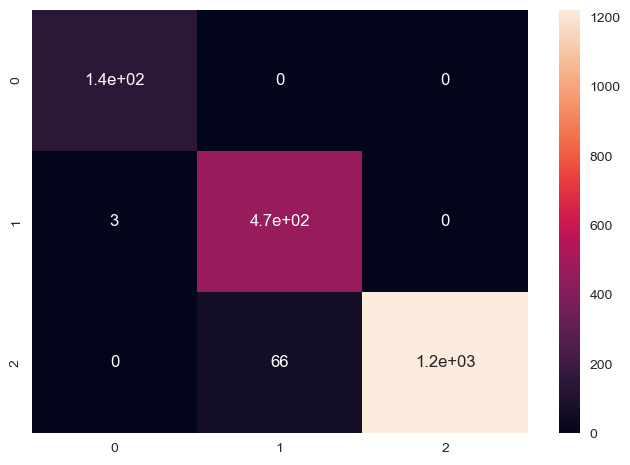

In [63]:
sns.heatmap(confusion_matrix(gthamin,y_test),annot=True)

In [64]:
print(classification_report(gthamin,y_test))

              precision    recall  f1-score   support

      Boomer       0.98      1.00      0.99       145
    Gen X-er       0.88      0.99      0.93       470
  Millennial       1.00      0.95      0.97      1288

    accuracy                           0.96      1903
   macro avg       0.95      0.98      0.96      1903
weighted avg       0.97      0.96      0.96      1903



In [65]:
b.fit(x_train,y_train)

BernoulliNB()

In [66]:
btahmin=b.predict(x_test)

In [67]:
accuracy_score(btahmin,y_test)

0.627430373095113

In [68]:
confusion_matrix(btahmin,y_test)

array([[  35,   42,   11,    0],
       [  49,  153,  205,    0],
       [  63,  337, 1006,    0],
       [   1,    1,    0,    0]], dtype=int64)

In [69]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

      Boomer       0.24      0.40      0.30        88
    Gen X-er       0.29      0.38      0.33       407
  Millennial       0.82      0.72      0.77      1406
     Unknown       0.00      0.00      0.00         2

    accuracy                           0.63      1903
   macro avg       0.34      0.37      0.35      1903
weighted avg       0.68      0.63      0.65      1903



In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
l=LogisticRegression()
l.fit(x_train,y_train)
ltahmin=l.predict(x_test)
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

      Boomer       0.00      0.00      0.00         0
    Gen X-er       0.91      0.70      0.79       686
  Millennial       0.95      0.96      0.96      1217

    accuracy                           0.87      1903
   macro avg       0.62      0.55      0.58      1903
weighted avg       0.94      0.87      0.90      1903



In [72]:
confusion_matrix(ltahmin,y_test)

array([[   0,    0,    0],
       [ 148,  483,   55],
       [   0,   50, 1167]], dtype=int64)

In [74]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
dtahmin=d.predict(x_test)
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

      Boomer       1.00      1.00      1.00       148
    Gen X-er       1.00      1.00      1.00       533
  Millennial       1.00      1.00      1.00      1222

    accuracy                           1.00      1903
   macro avg       1.00      1.00      1.00      1903
weighted avg       1.00      1.00      1.00      1903



In [75]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
rtahmin=r.predict(x_test)
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

      Boomer       0.99      1.00      1.00       147
    Gen X-er       1.00      1.00      1.00       534
  Millennial       1.00      1.00      1.00      1222

    accuracy                           1.00      1903
   macro avg       1.00      1.00      1.00      1903
weighted avg       1.00      1.00      1.00      1903



In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rtahmin)

0.999474513925381

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
h=GradientBoostingClassifier()
h.fit(x_train,y_train)
htahmin=h.predict(x_test)
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

      Boomer       1.00      1.00      1.00       148
    Gen X-er       1.00      1.00      1.00       533
  Millennial       1.00      1.00      1.00      1222

    accuracy                           1.00      1903
   macro avg       1.00      1.00      1.00      1903
weighted avg       1.00      1.00      1.00      1903



In [79]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(x_train,y_train)
ktahmin=k.predict(np.array(x_test))
confusion_matrix(ktahmin,y_test)

array([[ 143,    0,    0],
       [   5,  520,    5],
       [   0,   13, 1217]], dtype=int64)

In [80]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

      Boomer       0.97      1.00      0.98       143
    Gen X-er       0.98      0.98      0.98       530
  Millennial       1.00      0.99      0.99      1230

    accuracy                           0.99      1903
   macro avg       0.98      0.99      0.98      1903
weighted avg       0.99      0.99      0.99      1903

